In [50]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dff = pd.read_csv('tweets.csv')

### 📌 Introduction
This notebook analyzes Twitter trends based on engagement metrics such as **likes**, **retweets**, **replies**, and **views**. The goal is to identify **virality factors** and **popular topics** that drive engagement.

### 📊 1. Overview of Dataset

In [ ]:
# Check dataset information
df.info()

### ☁ 2. Word Cloud of Most Frequent Words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


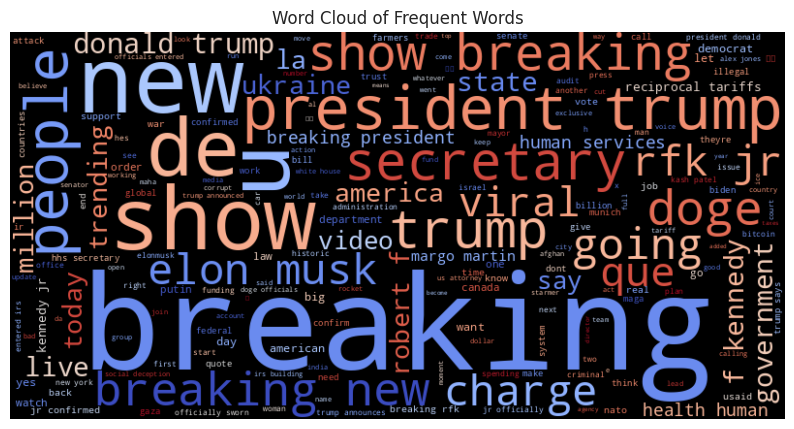

In [52]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK stopwords (only once)
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Apply text cleaning
dff["cleaned_content"] = dff["Content"].apply(clean_text)

# Combine all tweets into a single text
all_words = " ".join(dff["cleaned_content"])

# Generate Word Cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()

### 🔥 3. Engagement Metrics Distribution

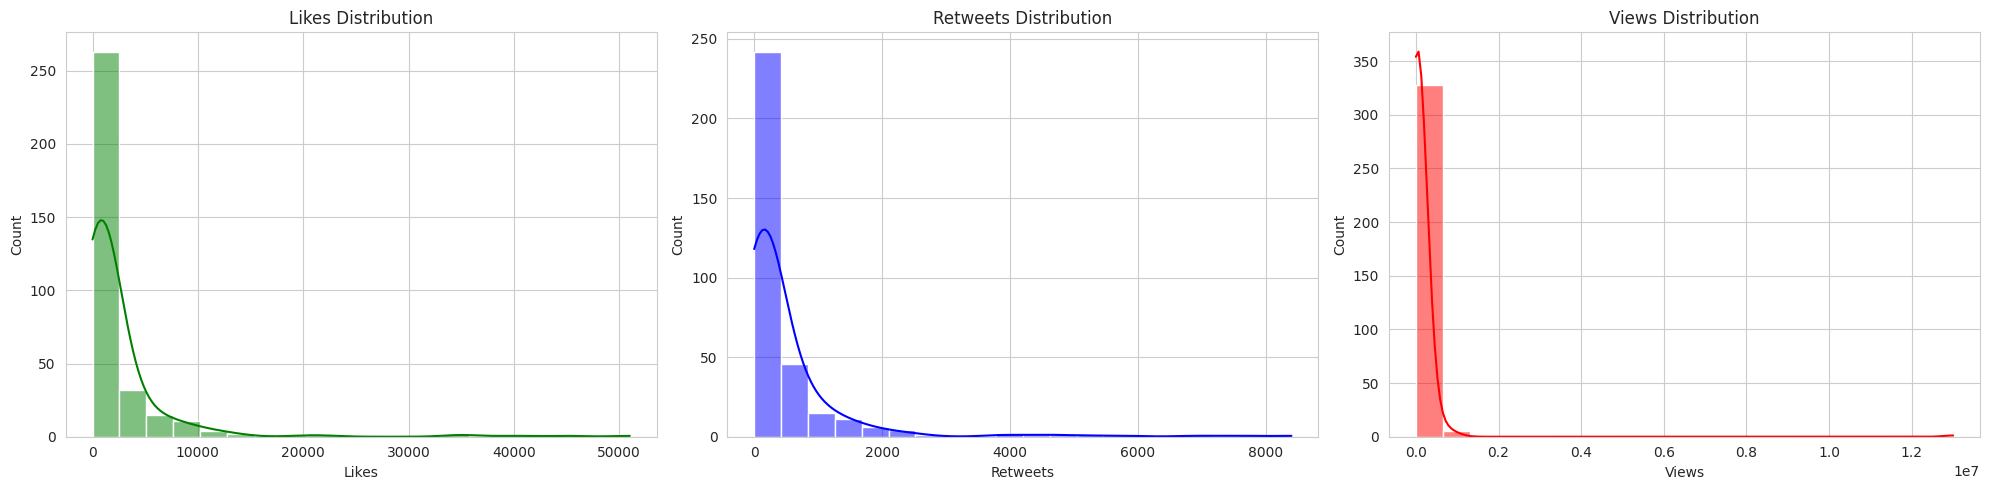

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20, 5))

# Likes Distribution
plt.subplot(1, 3, 1)
sns.histplot(dff["Likes"], bins=20, kde=True, color="green")
plt.xlabel("Likes")
plt.ylabel("Count")
plt.title("Likes Distribution")

# Retweets Distribution
plt.subplot(1, 3, 2)
sns.histplot(dff["Retweets"], bins=20, kde=True, color="blue")
plt.xlabel("Retweets")
plt.ylabel("Count")
plt.title("Retweets Distribution")

# Replies Distribution
plt.subplot(1, 3, 3)
sns.histplot(dff["Views"], bins=20, kde=True, color="red")
plt.xlabel("Views")
plt.ylabel("Count")
plt.title("Views Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

### ⏳ 4. Total Engagement and Views by Hour of the Day

In [54]:
# Convert to datetime format
dff["Date"] = pd.to_datetime(dff["Date"])

# Create new columns for Date & Time
dff["Only_Date"] = dff["Date"].dt.date
dff["Only_Time"] = dff["Date"].dt.time

dff["Hour"] = dff["Only_Time"].astype(str).str[:2]  # Extract first two characters (hour)
dff["Hour"] = dff["Hour"].astype(int)  # Convert to integer if needed

tweet = dff.drop(index=230).reset_index(drop=True)

tweet["Total_Engagement"] = tweet["Likes"] + tweet["Retweets"] + tweet["Replies"]

hourly_engagement = tweet.groupby("Hour")[["Total_Engagement", "Views"]].sum().reset_index()

<ipython-input-55-a704a16c5b62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_engagement, x="Hour", y="Total_Engagement", palette="Blues")


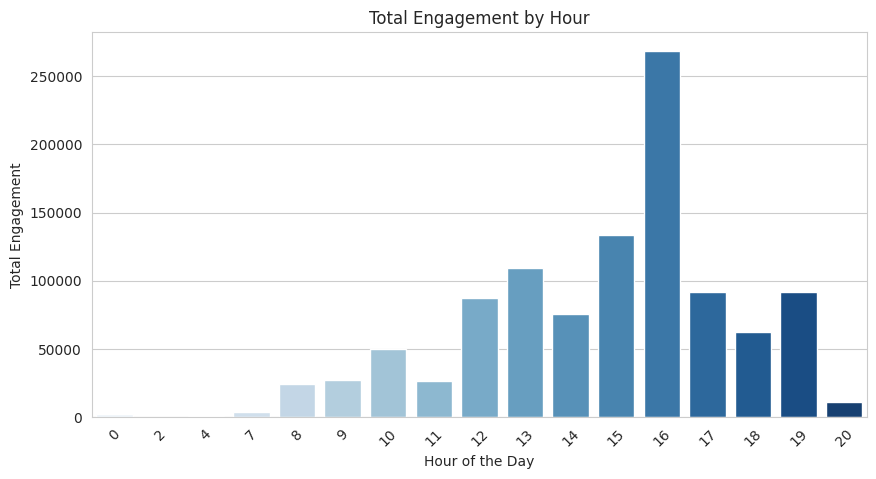

<ipython-input-55-a704a16c5b62>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_engagement, x="Hour", y="Views", palette="Greens")


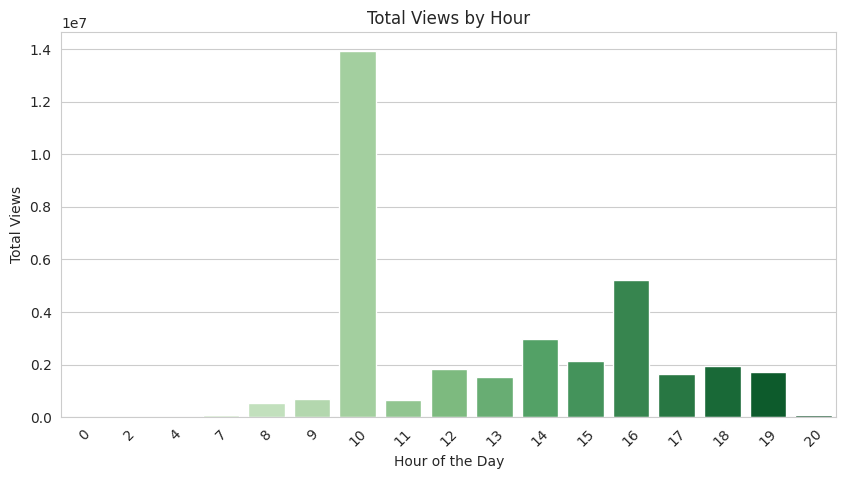

In [55]:
# Set style
sns.set_style("whitegrid")

# Plot Total Engagement per hour
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_engagement, x="Hour", y="Total_Engagement", palette="Blues")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Engagement")
plt.title("Total Engagement by Hour")
plt.xticks(rotation=45)
plt.show()

# Plot Views per hour
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_engagement, x="Hour", y="Views", palette="Greens")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Views")
plt.title("Total Views by Hour")
plt.xticks(rotation=45)
plt.show()

### 🔍 5. Most Common Hashtags

<ipython-input-56-de975dd7da1d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Hashtag", data=hashtags_df, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3586 (\N{THAI CHARACTER KHO KHAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


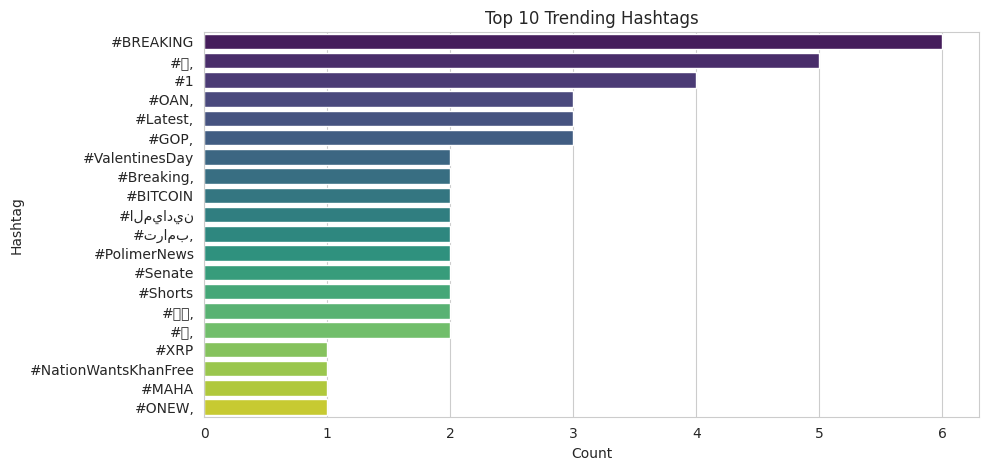

In [56]:
from collections import Counter
import seaborn as sns
plt.figure(figsize = (10,5))
# Flatten all hashtags into a single list
all_hashtags = [tag for tags in dff["Hashtags"].dropna() for tag in tags.split()]
top_hashtags = Counter(all_hashtags).most_common(20)

# Convert to DataFrame for visualization
hashtags_df = pd.DataFrame(top_hashtags, columns=["Hashtag", "Count"])

sns.barplot(x="Count", y="Hashtag", data=hashtags_df, palette="viridis")
plt.title("Top 10 Trending Hashtags")
plt.show()

### 👥 6. Top Influential Users

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12517 (\N{KATAKANA LETTER SMALL YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 59904 (\uea00) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


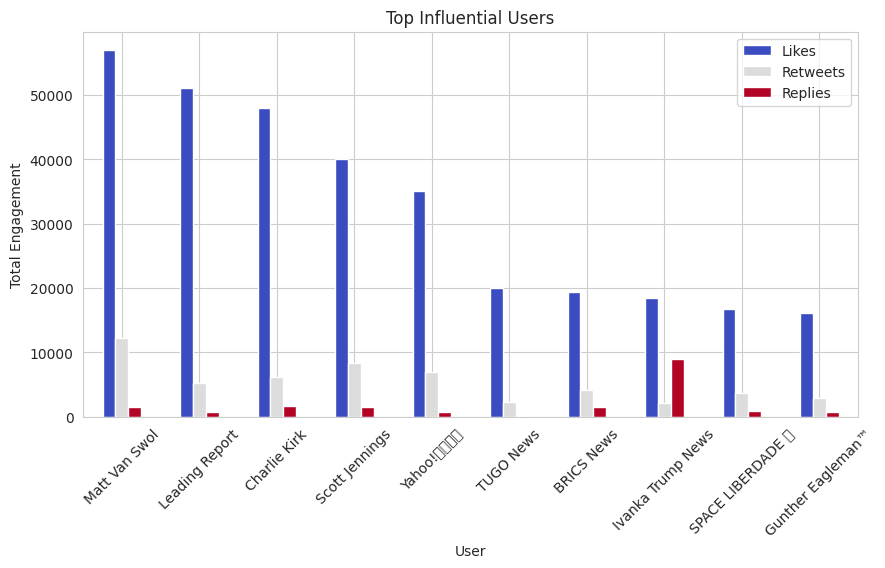

In [57]:
top_users = dff.groupby("User")[["Likes", "Retweets", "Replies"]].sum().sort_values(by="Likes", ascending=False).head(10)

top_users.plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.title("Top Influential Users")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.show()

In [58]:
# Ensure Retweets, Likes, and Replies are numeric
dff["Retweets"] = pd.to_numeric(dff["Retweets"], errors="coerce").fillna(0)
dff["Likes"] = pd.to_numeric(dff["Likes"], errors="coerce").fillna(0)
dff["Replies"] = pd.to_numeric(dff["Replies"], errors="coerce").fillna(0)

# Compute Virality Score
dff["Virality Score"] = dff["Retweets"] / (dff["Likes"] + dff["Replies"] + 1)

# Sort by highest virality
top_viral = dff.sort_values(by="Virality Score", ascending=False).head(10)

### 🏆 7. Identifying Most Viral Tweets

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3612 (\N{THAI CHARACTER PHO PHUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

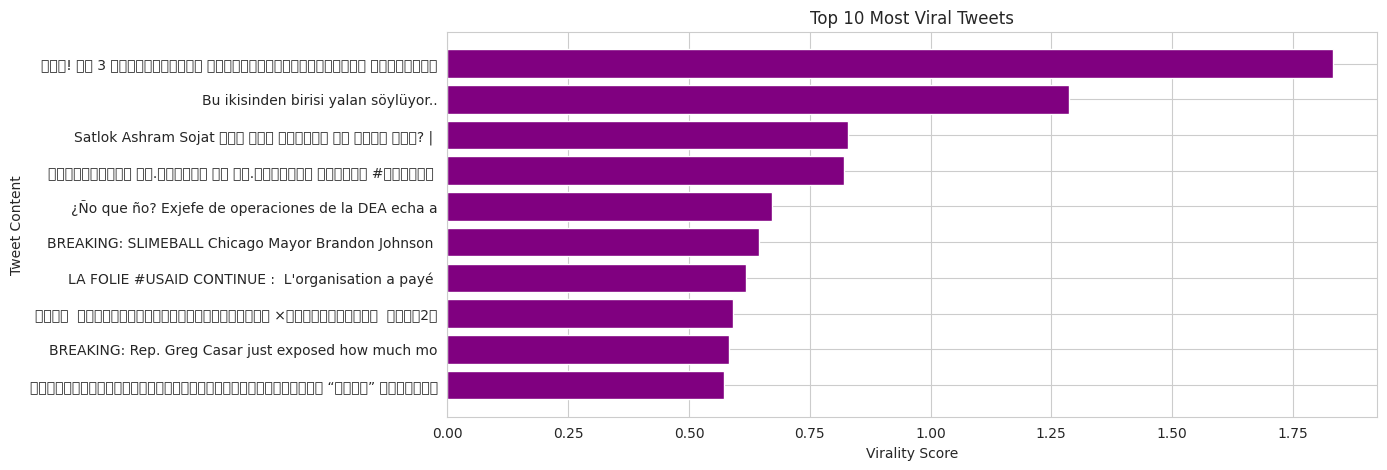

In [59]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os


# Create the plot
plt.figure(figsize=(12, 5))
plt.barh(top_viral["Content"].str[:50], top_viral["Virality Score"], color="purple")
plt.xlabel("Virality Score")
plt.ylabel("Tweet Content")
plt.title("Top 10 Most Viral Tweets")
plt.gca().invert_yaxis()
plt.show()
